# Project Overview

#### This project aims to predict HDB resale prices in Singapore using historical transaction data from 2017 to 2022. The analysis includes exploratory data analysis (EDA), feature engineering, and building a linear regression model to estimate resale price trends and feature impact.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Loading

#### Load the CSV file containing resale flat prices. This dataset includes columns like month, town, flat type, floor area, remaining lease, and resale price.

In [2]:
df = pd.read_csv("Singapore-2017-2022_flat_prices.csv")

In [3]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
134163,2022-08,YISHUN,5 ROOM,850,YISHUN ST 81,01 TO 03,122.0,Improved,1988,65 years,570000.0
134164,2022-08,YISHUN,EXECUTIVE,325,YISHUN CTRL,07 TO 09,146.0,Maisonette,1988,65 years 04 months,768888.0
134165,2022-08,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,150.0,Maisonette,1988,65 years 04 months,778000.0
134166,2022-08,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,65 years 04 months,838000.0


# 2. Data Cleaning & Feature Engineering

#### Taking care of null values, removing duplicates, dropping non-informative columns like `block`, and performing one-hot encoding on categorical features like town and flat type.

In [53]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [54]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [55]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,134168.000000,134168.000000,1.341680e+05
mean,97.765356,1995.325487,4.706689e+05
std,24.098741,13.602076,1.629509e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.500000e+05
50%,94.000000,1996.000000,4.400000e+05
75%,113.000000,2006.000000,5.550000e+05
max,249.000000,2019.000000,1.418000e+06


In [56]:
df.duplicated().sum()

259

In [57]:
unique_data_frame = df.drop_duplicates().copy()

In [58]:
unique_data_frame.duplicated().sum()

0

In [59]:
unique_data_frame['block'] = pd.to_numeric(unique_data_frame['block'], errors='coerce')

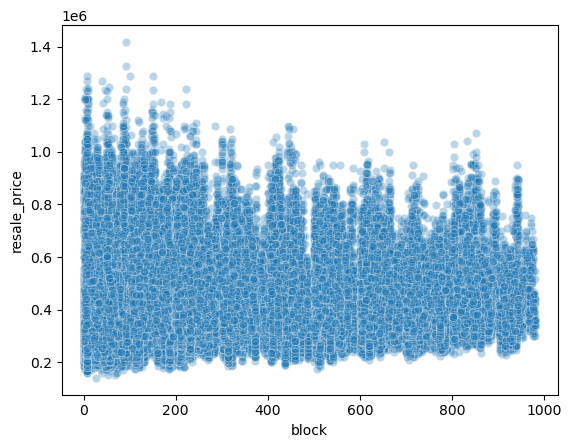

In [60]:
sns.scatterplot(data=unique_data_frame, x='block', y='resale_price', alpha=0.3);

In [61]:
unique_data_frame = unique_data_frame.drop(columns=['block']) #dropped block 

In [62]:
unique_data_frame = unique_data_frame.drop(columns=['street_name']) #dropped street name 

In [63]:
unique_data_frame['month'] = pd.to_datetime(unique_data_frame['month'], format='%Y-%m')
unique_data_frame['year'] = unique_data_frame['month'].dt.year
unique_data_frame = unique_data_frame.drop(columns=['month']) #dropped month

In [64]:
df_encoded = pd.get_dummies(unique_data_frame, columns=['flat_type', 'town', 'storey_range','flat_model'], drop_first=True)

# 3. Exploratory Data Analysis (EDA)

#### In this section, we explore the distribution of resale prices, and analyze how features like flat type, remaining lease, and floor area affect pricing.

## 3.1. Resale Price Distribution

We visualize the distribution of resale prices to understand central tendency, skewness, and outliers.

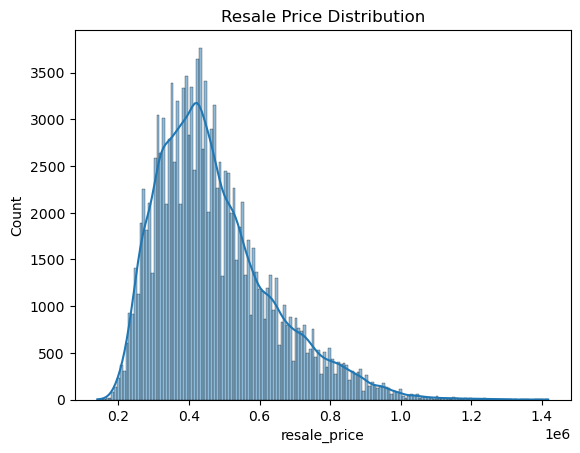

In [16]:
sns.histplot(unique_data_frame['resale_price'], kde=True)
plt.title("Resale Price Distribution"); #Can implement a ticker for showing actual prices in x axis

## 3.2. Floor Area vs Resale Price

Scatterplot to visualize the relationship between floor area and resale price

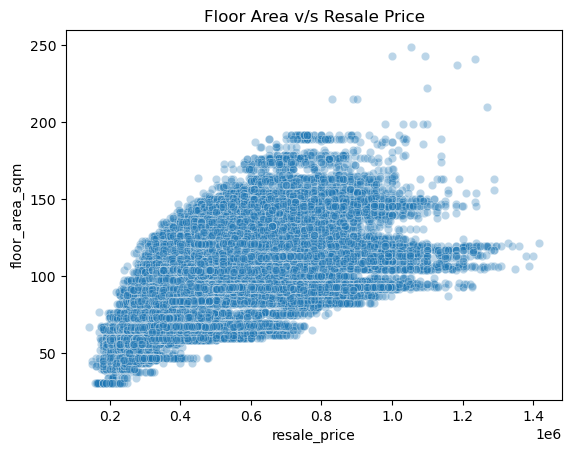

In [17]:
sns.scatterplot(data=unique_data_frame, x='resale_price', y='floor_area_sqm', alpha=0.3)
plt.title("Floor Area v/s Resale Price");

## 3.3. Flat Type vs Price

Boxplots to compare average resale price across flat types.

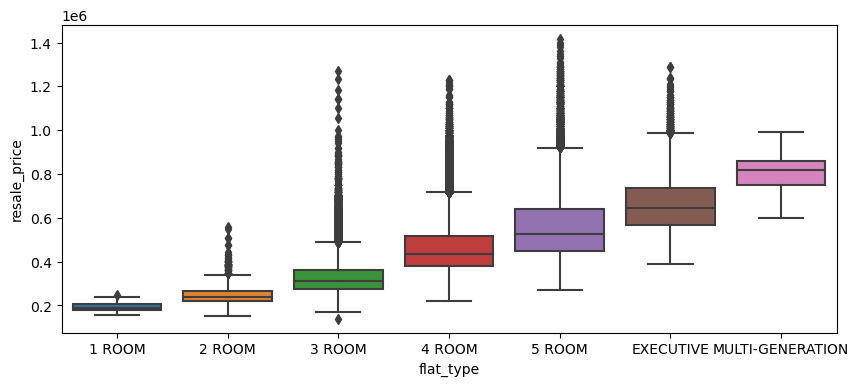

In [18]:
plt.figure(figsize=(10,4))
flat_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.boxplot(x='flat_type', y='resale_price', data=unique_data_frame, order = flat_order);

## 3.4. Time Trend of Resale Prices

Line plot showing price trends over the years from 2017 to 2022.

Text(0.5, 1.0, 'Average Resale Price Over Time')

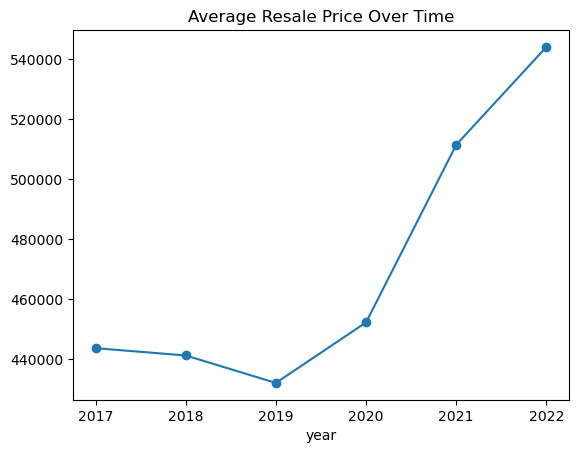

In [19]:
unique_data_frame.groupby('year')['resale_price'].mean().plot(marker='o')
plt.title("Average Resale Price Over Time")

In [65]:
def lease_to_years(lease_str):
    try:
        parts = lease_str.split()
        years = int(parts[0])
        months = int(parts[2]) if len(parts) > 2 else 0
        return years + months / 12
    except:
        return np.nan

df_encoded['remaining_lease'] = unique_data_frame['remaining_lease'].apply(lease_to_years)

## 3.5. Remaining Lease vs Price

Scatter plot reveals a non-linear relationship — resale prices drop sharply when lease < 50 years and increases sharply when lease is > 90 years.

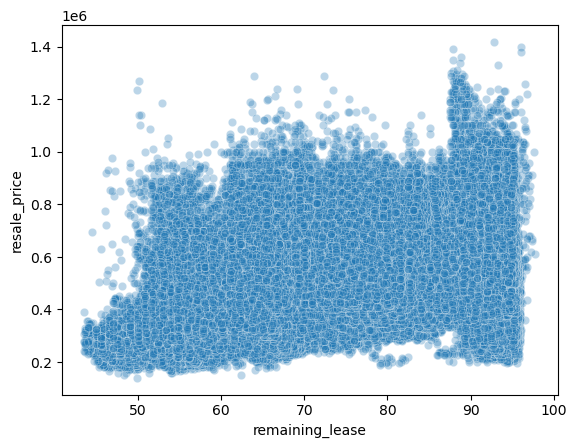

In [21]:
sns.scatterplot(data=unique_data_frame, x='remaining_lease', y='resale_price', alpha=0.3);

<Axes: >

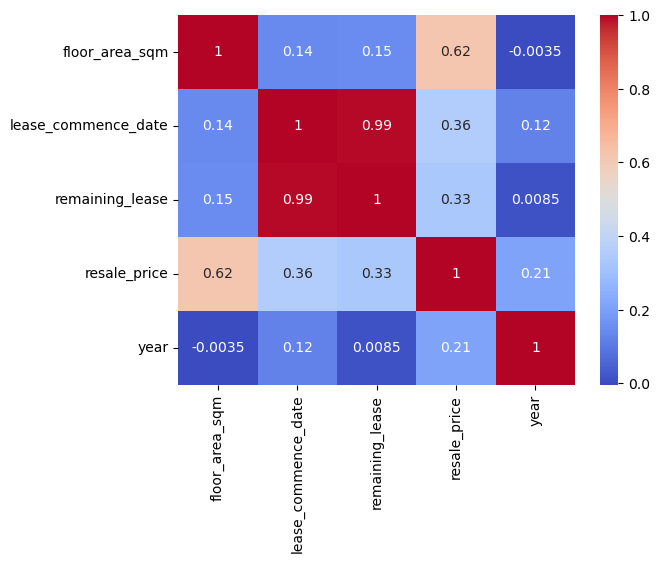

In [22]:
numeric_cols = unique_data_frame.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')

# 4. Model Building (Linear Regression)

#### We build a linear regression model using scikit-learn to predict resale prices based on selected features.

In [38]:
df_encoded #tester

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,year,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,44.0,1979,NaN,232000.0,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67.0,1978,NaN,250000.0,2017,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,67.0,1980,NaN,262000.0,2017,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,68.0,1980,NaN,265000.0,2017,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,67.0,1980,NaN,265000.0,2017,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134163,122.0,1988,NaN,570000.0,2022,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
134164,146.0,1988,NaN,768888.0,2022,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
134165,150.0,1988,NaN,778000.0,2022,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
134166,146.0,1988,NaN,838000.0,2022,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X = df_encoded.drop(['resale_price'], axis=1)
y = df_encoded['resale_price']

In [89]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()

In [103]:
model.fit(X_train,y_train)

LinearRegression()

In [75]:
df_encoded.dtypes

floor_area_sqm           float64
lease_commence_date        int64
remaining_lease          float64
resale_price             float64
year                       int64
                          ...   
flat_model_Simplified      uint8
flat_model_Standard        uint8
flat_model_Terrace         uint8
flat_model_Type S1         uint8
flat_model_Type S2         uint8
Length: 72, dtype: object

In [76]:
print(X.dtypes.unique()) 

[dtype('float64') dtype('int64') dtype('uint8')]


In [104]:
y_pred = model.predict(X_test)

In [105]:
y_pred

array([212891.27120228, 519867.63092677, 414453.46598206, ...,
       630097.5473005 , 667403.55733444, 356874.68287594])

# 5. Model Evaluation

#### Evaluate model performance using metrics like R² and MAE. 

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [107]:
mean_absolute_error(y_test, y_pred)

47726.58481923175

In [108]:
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.8582188993222978


#### The linear model achieved:

- **R² Score**: 0.85  
- **MAE**: ~47,700 SGD

This indicates a strong fit, though prediction error on high-priced flats can be improved.